In [1]:
import math
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

## Wyznaczyć histogram i entropię danych wejściowych.


In [2]:
def calculate_histogram_and_entropy(pgm_file):
    with Image.open(pgm_file) as img:
        pixels = np.array(img).flatten()

    histogram = np.bincount(pixels, minlength=256)
    total_pixels = len(pixels)

    probabilities = histogram / total_pixels

    entropy = 0.0
    for p in probabilities:
        if p > 0:
            entropy -= p * math.log2(p)

    return histogram, entropy


def plot_histogram(histogram, pgm_file, entropy):
    plt.figure(figsize=(15, 4))
    plt.bar(range(256), histogram, width=1.0)
    plt.title(f"Histogram dla {pgm_file}\nEntropia: {entropy:.2f}", fontsize=16)
    plt.xlabel("Poziom szarości", fontsize=14)
    plt.ylabel("Liczba pikseli", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, 255)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    file_name = pgm_file.split("/")[-1][:-4]
    plt.savefig(f"histograms/{file_name}")
    plt.show()

Entropia obrazu obrazy_testowe/normal_10.pgm: 5.37 bitów na symbol


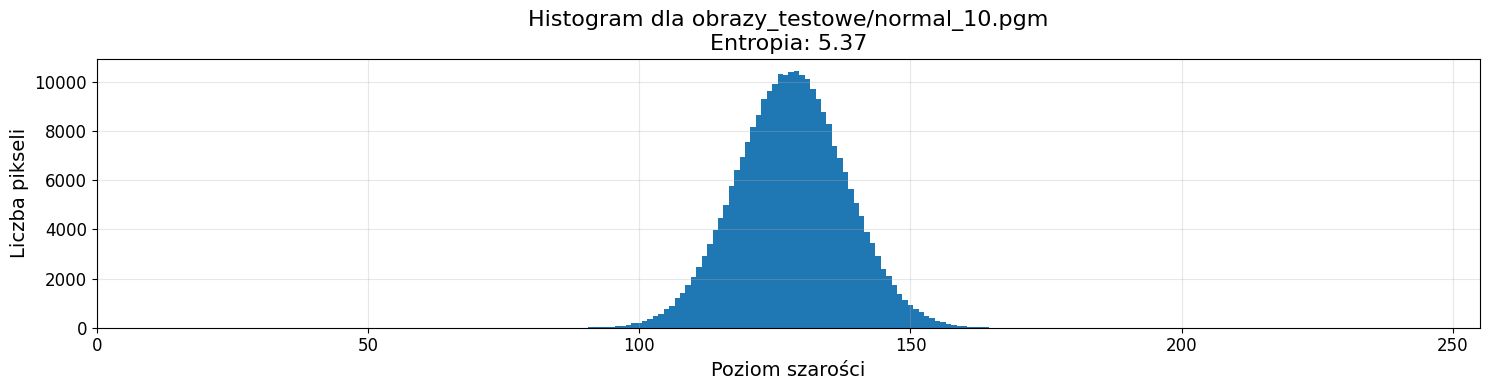

Entropia obrazu obrazy_testowe/geometr_09.pgm: 4.69 bitów na symbol


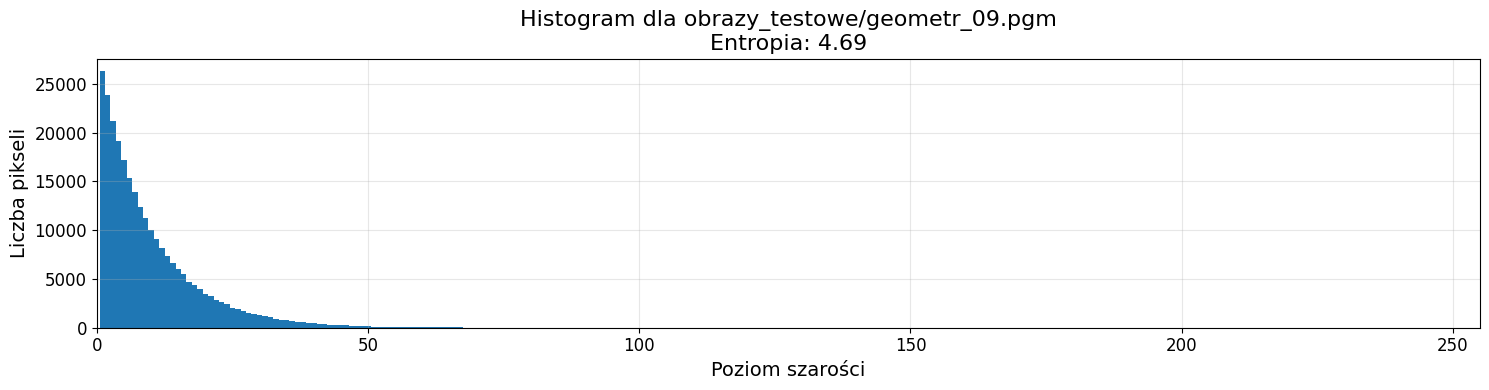

Entropia obrazu obrazy_testowe/peppers.pgm: 6.76 bitów na symbol


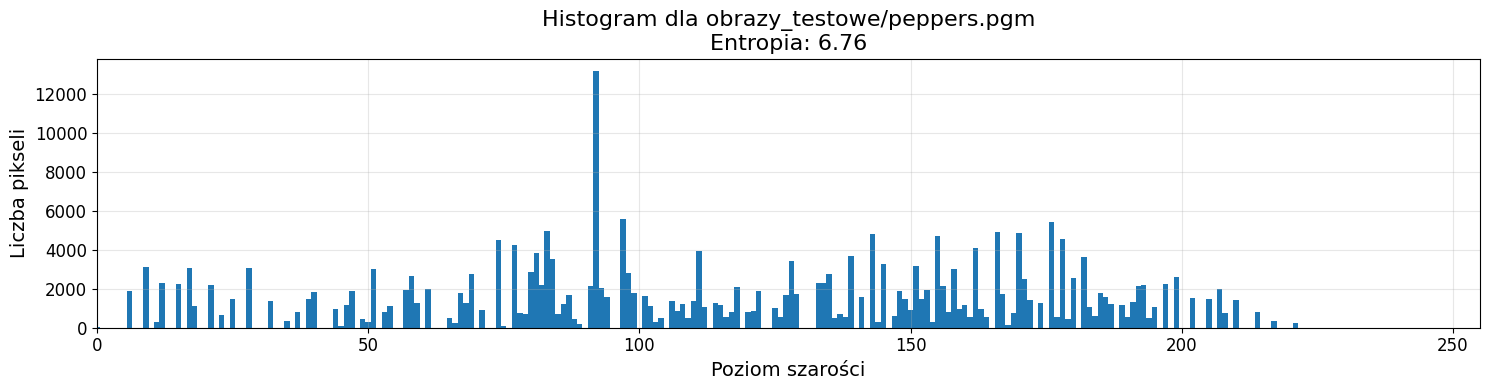

Entropia obrazu obrazy_testowe/geometr_099.pgm: 7.65 bitów na symbol


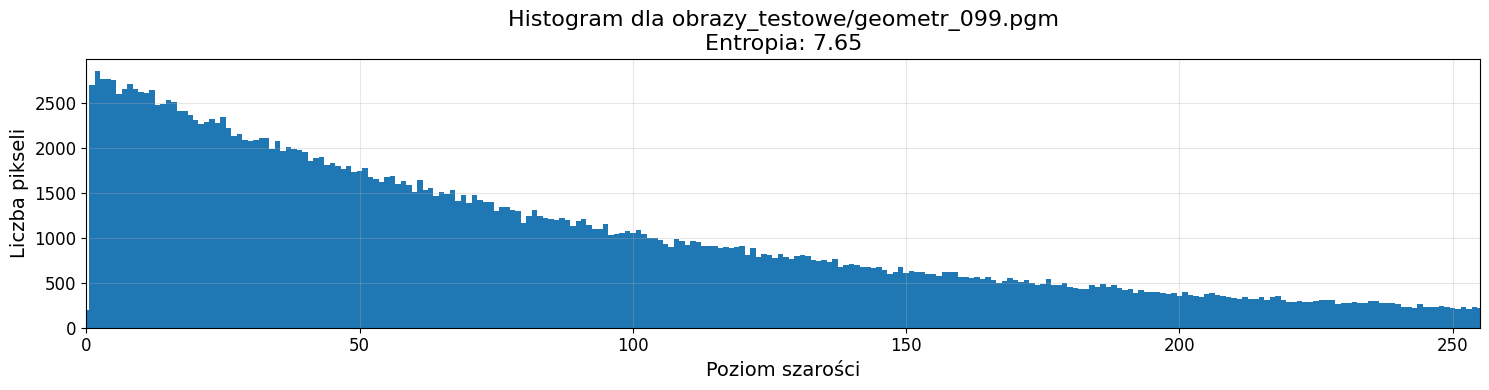

Entropia obrazu obrazy_testowe/laplace_30.pgm: 7.29 bitów na symbol


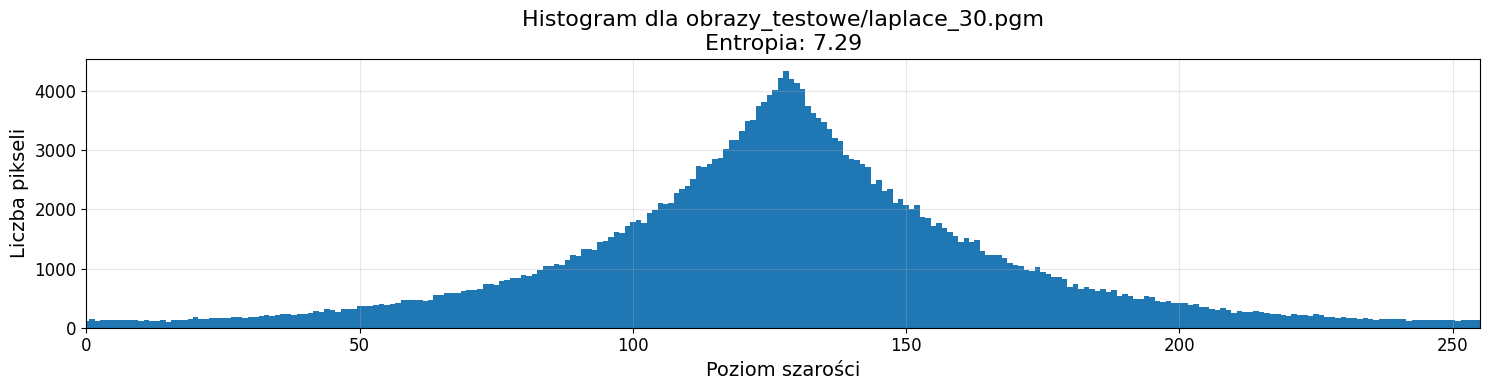

Entropia obrazu obrazy_testowe/laplace_20.pgm: 6.76 bitów na symbol


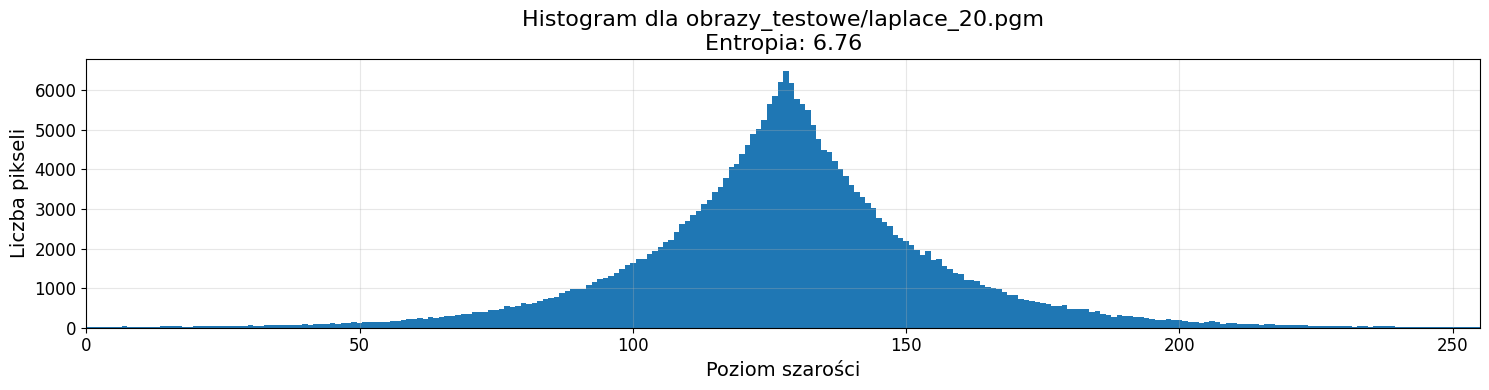

Entropia obrazu obrazy_testowe/uniform.pgm: 8.00 bitów na symbol


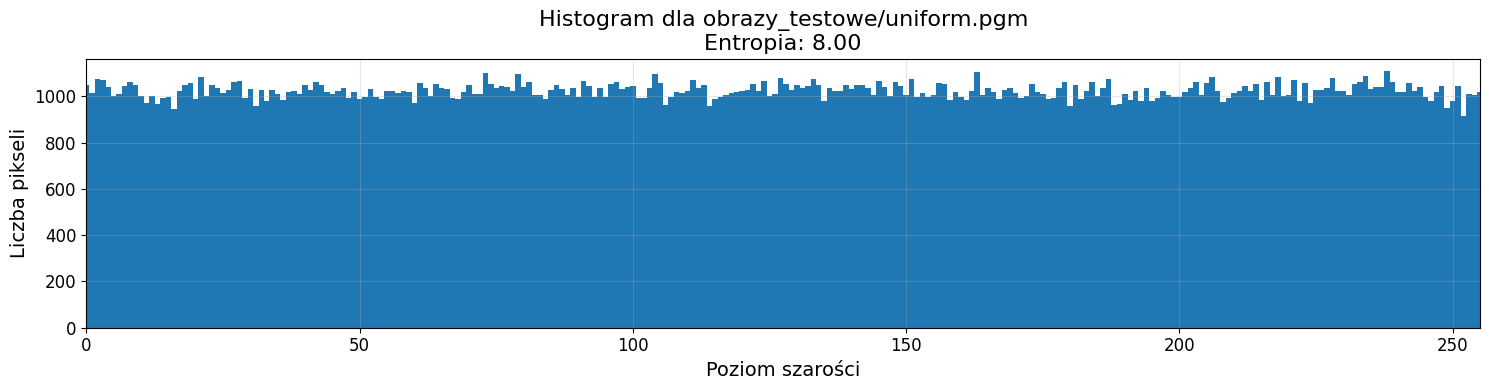

Entropia obrazu obrazy_testowe/lena.pgm: 7.45 bitów na symbol


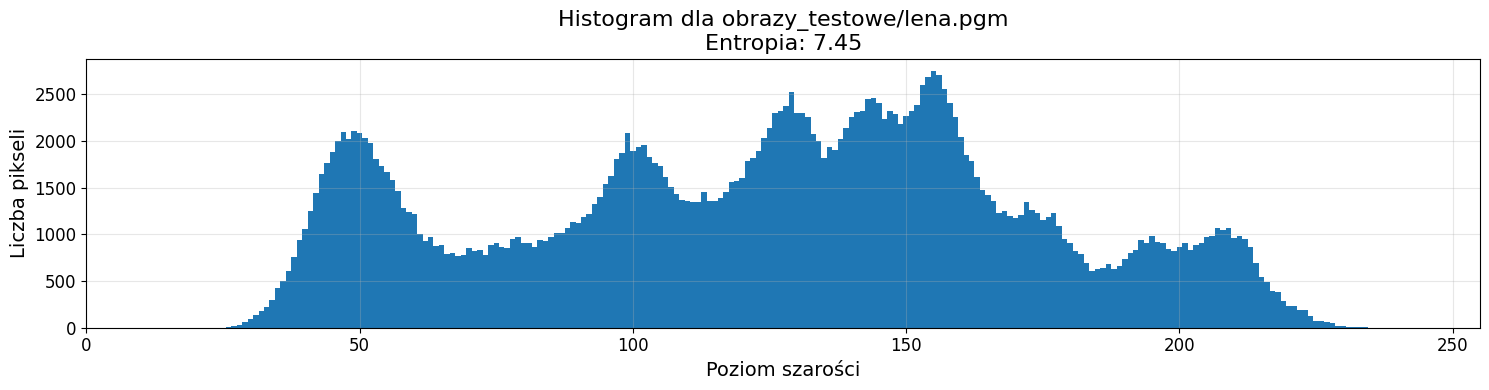

Entropia obrazu obrazy_testowe/laplace_10.pgm: 5.77 bitów na symbol


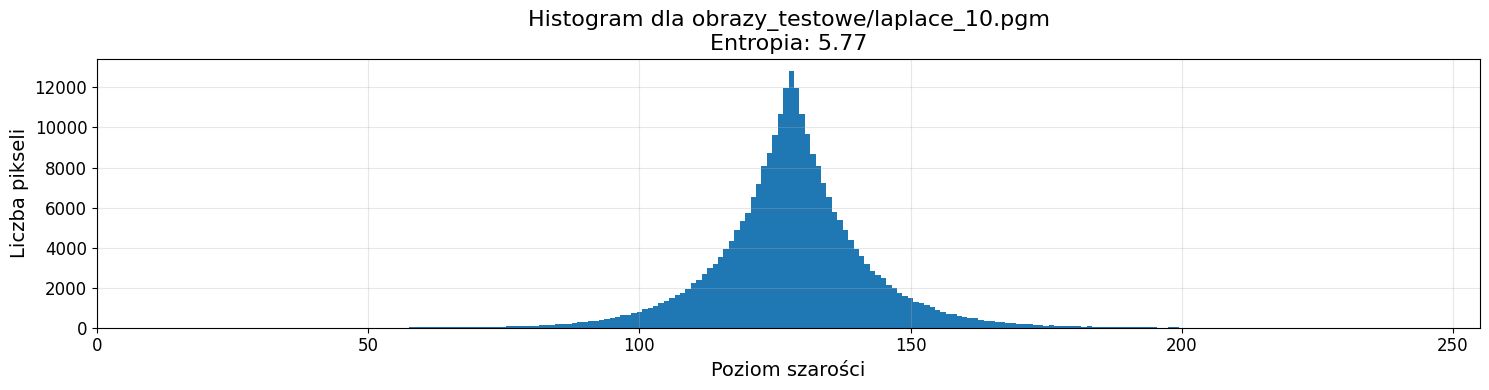

Entropia obrazu obrazy_testowe/boat.pgm: 7.19 bitów na symbol


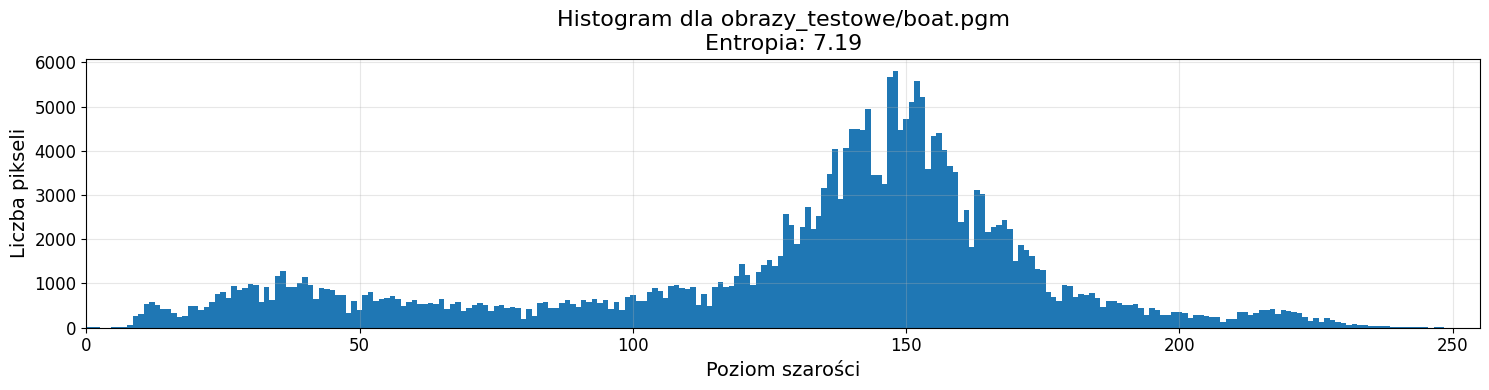

Entropia obrazu obrazy_testowe/normal_50.pgm: 7.65 bitów na symbol


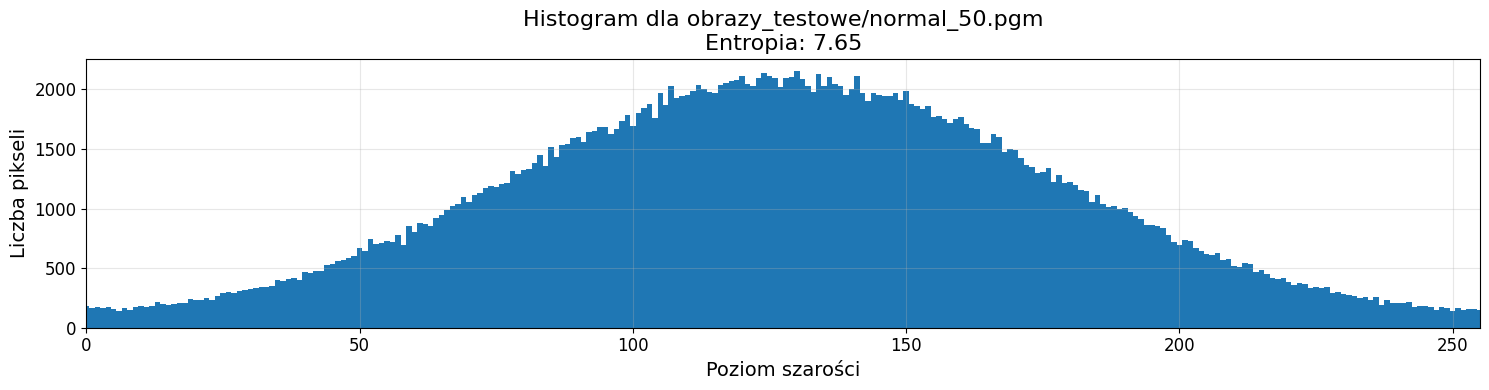

Entropia obrazu obrazy_testowe/geometr_05.pgm: 2.00 bitów na symbol


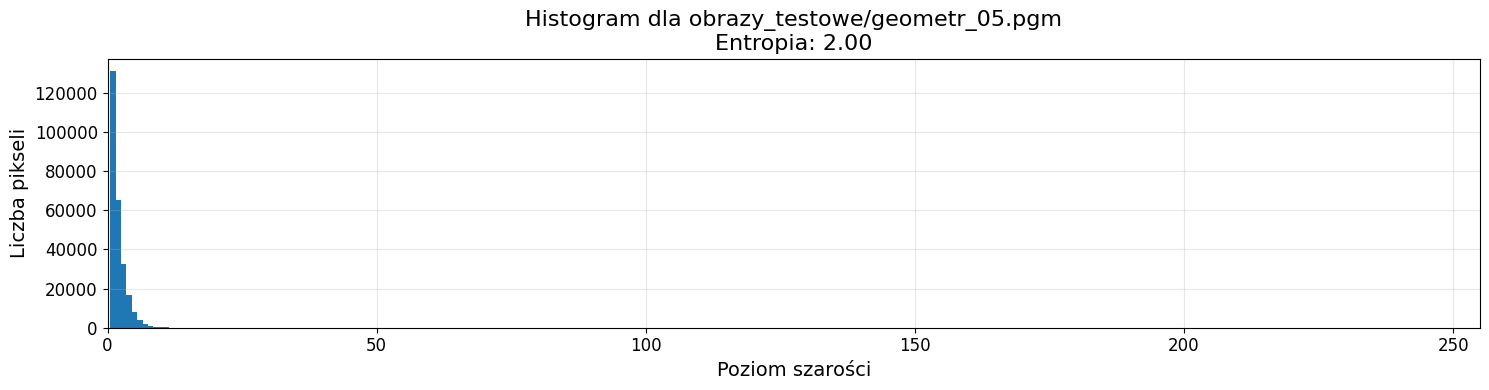

Entropia obrazu obrazy_testowe/barbara.pgm: 7.63 bitów na symbol


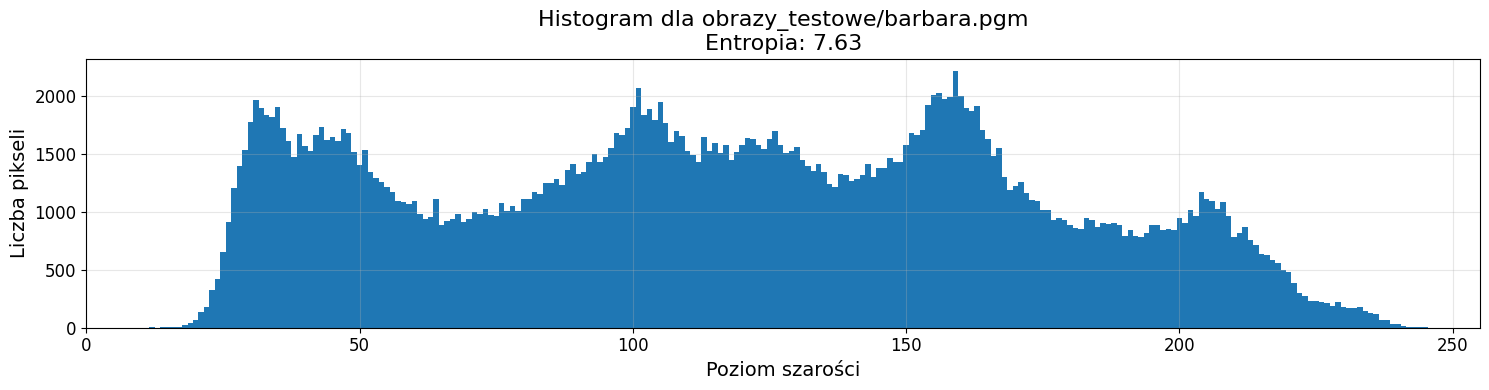

Entropia obrazu obrazy_testowe/chronometer.pgm: 6.11 bitów na symbol


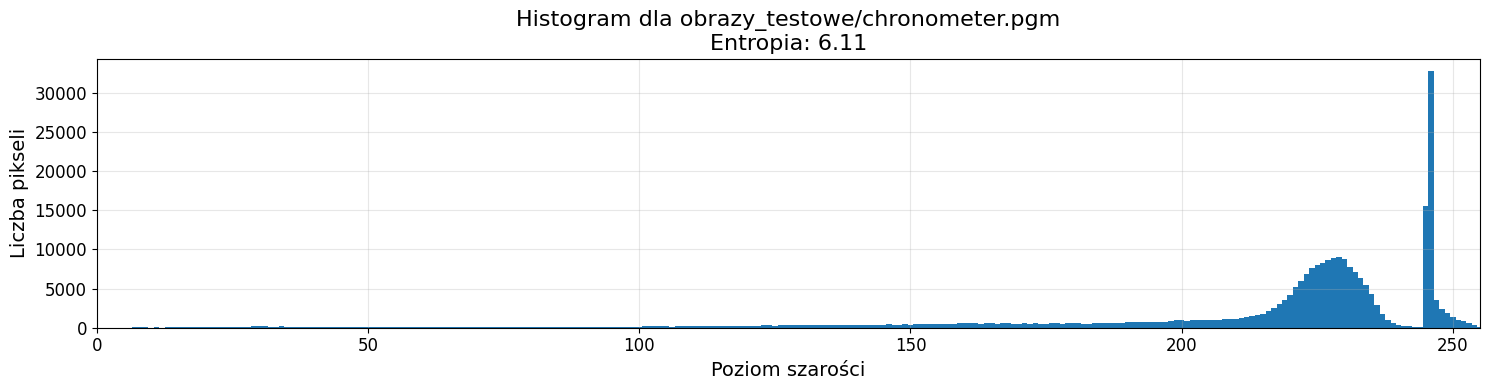

Entropia obrazu obrazy_testowe/normal_30.pgm: 6.95 bitów na symbol


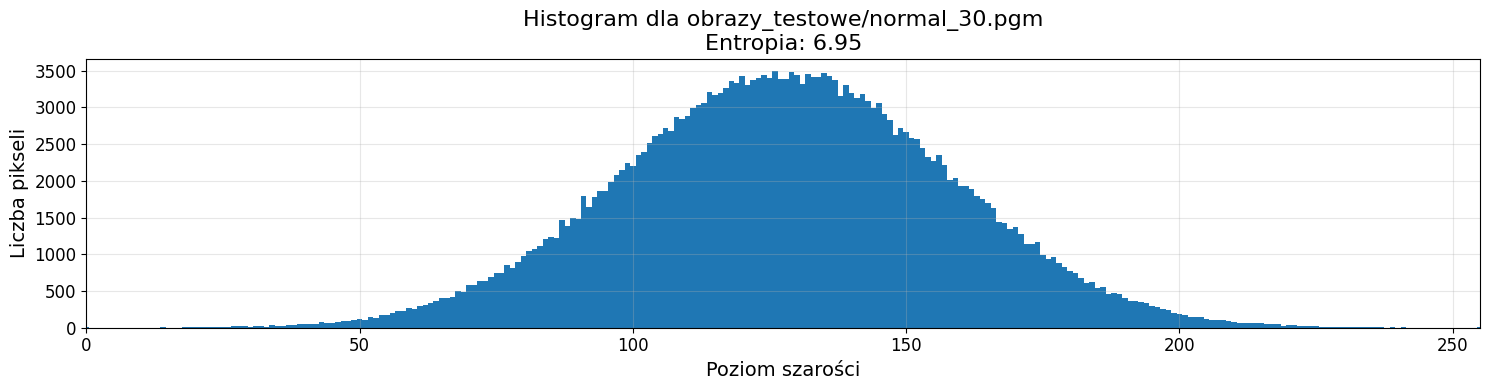

Entropia obrazu obrazy_testowe/mandril.pgm: 7.29 bitów na symbol


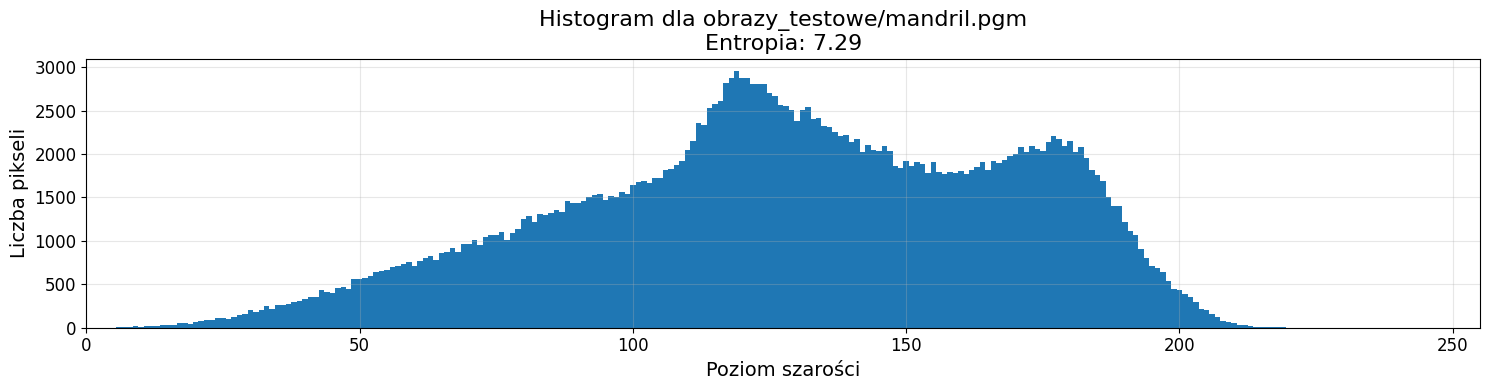

In [3]:
directories = ["obrazy_testowe"]
for directory in directories:
    files = os.listdir(directory)
    for file in files:
        pgm_file = os.path.join(directory, file)
        hist, entropy = calculate_histogram_and_entropy(pgm_file)

        print(f"Entropia obrazu {pgm_file}: {entropy:.2f} bitów na symbol")
        plot_histogram(hist, pgm_file, entropy)

## Porównać entropię ze średnią długością bitową kodu wyjściowego; wyjaśnić dlaczego średnia długość bitowa może być mniejsza od wyznaczonej entropii.


## Współczynnik kompresji


In [4]:
def calculate_compression_ratio(original_image_path, compressed_file_path):
    with Image.open(original_image_path) as img:
        width, height = img.size
        original_size_bits = width * height * 8
        compressed_size_bits = os.path.getsize(compressed_file_path) * 8
        compression_ratio = original_size_bits / compressed_size_bits
        results = {
            "Nazwa orygianlnego pliku": original_image_path,
            "Oryginalny rozmiar [bits]": original_size_bits,
            "Rozmiar po kompresji [bits]": compressed_size_bits,
            "Współczynnik kompresji": compression_ratio,
        }
    return results

In [5]:
original_images = os.listdir("obrazy_testowe")
compressed_files = os.listdir("zakodowane_adaptacyjny_huffmann")

results = []

for original_image_path, compressed_file_path in zip(original_images, compressed_files):
    original_image_path = os.path.join("obrazy_testowe", original_image_path)
    compressed_file_path = os.path.join(
        "zakodowane_adaptacyjny_huffmann", compressed_file_path
    )

    results.append(
        calculate_compression_ratio(original_image_path, compressed_file_path)
    )

In [6]:
pd.DataFrame(results).sort_values("Współczynnik kompresji", ascending=False)

,Nazwa orygianlnego pliku,Oryginalny rozmiar [bits],Rozmiar po kompresji [bits],Współczynnik kompresji
10,obrazy_testowe/normal_50.pgm,2097152,524720,3.996707
3,obrazy_testowe/geometr_099.pgm,2097152,1241104,1.689747
15,obrazy_testowe/mandril.pgm,2097152,1416672,1.480337
7,obrazy_testowe/lena.pgm,2097152,1522728,1.377233
14,obrazy_testowe/normal_30.pgm,2097152,1610368,1.302281
1,obrazy_testowe/geometr_09.pgm,2097152,1782480,1.176536
12,obrazy_testowe/barbara.pgm,2097152,1782728,1.176372
5,obrazy_testowe/laplace_20.pgm,2097152,1835712,1.142419
11,obrazy_testowe/geometr_05.pgm,2097152,1895776,1.106224
13,obrazy_testowe/chronometer.pgm,2097152,1920392,1.092044


In [7]:
def calculate_entropy(image_path):
    with Image.open(image_path) as img:
        pixels = np.array(img).flatten()

    histogram = np.bincount(pixels, minlength=256)
    total_pixels = len(pixels)

    probabilities = histogram / total_pixels

    entropy = 0.0
    for p in probabilities:
        if p > 0:
            entropy -= p * math.log2(p)

    return entropy

In [8]:
def calculate_avg_code_length(original_path, compressed_path):
    with open(original_path, "rb") as f:
        num_symbols = len(f.read())
        compressed_bits = os.path.getsize(compressed_path) * 8

    return compressed_bits / num_symbols

In [9]:
def calculate_efficiency(original_path, compressed_path):
    entropy = calculate_entropy(original_path)
    avg_length = calculate_avg_code_length(original_path, compressed_path)

    return entropy / avg_length if avg_length != 0 else 0

In [10]:
def calculate_compression_ratio(original_path, compressed_path):
    original_size = os.path.getsize(original_path)
    compressed_size = os.path.getsize(compressed_path)

    return original_size / compressed_size

In [11]:
def analyze_without_codebook(
    files,
    compressed_folder="zwykly_huffman",
    decompressed_folder="kody_wyjsciowe_adaptacyjny_huffmann",
    original_folder="obrazy_testowe",
):

    results = []

    for decompressed, original, compressed in files:

        decompressed = os.path.join(decompressed_folder, decompressed)
        original = os.path.join(original_folder, original)
        compressed = os.path.join(compressed_folder, compressed)

        if not os.path.exists(compressed):
            continue

        entry = {
            "Nazwa pliku": original.split("/")[-1],
            "Współczynnik kompresji": calculate_compression_ratio(original, compressed),
            "Entropia": calculate_entropy(original),
            "Średnia długość bitowa": calculate_avg_code_length(
                decompressed, compressed
            ),
            "Efektywność kodowania": calculate_efficiency(original, compressed),
        }

        results.append(entry)

    return pd.DataFrame(results)

In [12]:
file_mapping = [
    # [decompressed, original, compressed]
    ["lapla10_decom.pgm", "laplace_10.pgm", "lapla10_com.bin"],
    ["lapla20_decom.pgm", "laplace_20.pgm", "lapla20_com.bin"],
    ["lapla30_decom.pgm", "laplace_30.pgm", "lapla30_com.bin"],
    ["nor10_decom.pgm", "normal_10.pgm", "nor10_com.bin"],
    ["nor30_decom.pgm", "normal_30.pgm", "nor30_com.bin"],
    ["nor50_decom.pgm", "normal_50.pgm", "nor50_com.bin"],
    ["geo05_decom.pgm", "geometr_05.pgm", "geo05_com.bin"],
    ["geo09_decom.pgm", "geometr_09.pgm", "geo09_com.bin"],
    ["geo099_decom.pgm", "geometr_099.pgm", "geo099_com.bin"],
    ["man_decom.pgm", "mandril.pgm", "man_com.bin"],
    ["chro_decom.pgm", "chronometer.pgm", "chro_com.bin"],
    ["boat_decom.pgm", "boat.pgm", "boat_com.bin"],
    ["pepp_decom.pgm", "peppers.pgm", "pepp_com.bin"],
    ["barbara_decom.pgm", "barbara.pgm", "barbara_com.bin"],
    ["lena_decom.pgm", "lena.pgm", "lena_com.bin"],
    ["uni_decom.pgm", "uniform.pgm", "uni_com.bin"],
]

In [13]:
df = analyze_without_codebook(
    files=file_mapping,
    compressed_folder="zwykly_huffman",
    decompressed_folder="kody_wyjsciowe_adaptacyjny_huffmann",
    original_folder="obrazy_testowe",
)

df[
    [
        "Współczynnik kompresji",
        "Entropia",
        "Średnia długość bitowa",
        "Efektywność kodowania",
    ]
] = df[
    [
        "Współczynnik kompresji",
        "Entropia",
        "Średnia długość bitowa",
        "Efektywność kodowania",
    ]
].round(2)

df

,Nazwa pliku,Współczynnik kompresji,Entropia,Średnia długość bitowa,Efektywność kodowania
0,laplace_10.pgm,1.38,5.77,5.80,0.99
1,laplace_20.pgm,1.18,6.76,6.79,1.00
2,laplace_30.pgm,1.09,7.29,7.31,1.00
3,normal_10.pgm,1.48,5.37,5.40,0.99
4,normal_30.pgm,1.14,6.95,6.99,0.99
5,normal_50.pgm,1.04,7.65,7.67,1.00
6,geometr_05.pgm,4.00,2.00,2.00,1.00
7,geometr_09.pgm,1.69,4.69,4.73,0.99
8,geometr_099.pgm,1.04,7.65,7.68,1.00
9,mandril.pgm,1.09,7.29,7.32,1.00


In [14]:
def load_pgm_image(filepath):
    return np.array(Image.open(filepath))


def calculate_pairs(image):
    pairs = []
    height, width = image.shape
    for i in range(height):
        for j in range(width - 1):
            pairs.append((image[i, j], image[i, j + 1]))
    return pairs


def calculate_triples(image):
    triples = []
    height, width = image.shape
    for i in range(height):
        for j in range(width - 2):
            triples.append((image[i, j], image[i, j + 1], image[i, j + 2]))
    return triples


def calculate_entropy(symbols):
    counter = Counter(symbols)
    total = len(symbols)
    entropy = 0

    for count in counter.values():
        probability = count / total
        entropy -= probability * math.log2(probability)

    return entropy


def analyze_image_entropy(image_path):
    image = load_pgm_image(image_path)

    pixels = image.flatten()
    entropy_1 = calculate_entropy(pixels)

    pairs = calculate_pairs(image)
    entropy_2 = calculate_entropy(pairs)

    triples = calculate_triples(image)
    entropy_3 = calculate_entropy(triples)

    return {
        "first_order": entropy_1,
        "second_order": entropy_2,
        "third_order": entropy_3,
        "second_order_per_symbol": entropy_2 / 2,  # Entropia na symbol dla par
        "third_order_per_symbol": entropy_3 / 3,  # Entropia na symbol dla trójek
    }


image_path = "lena.pgm"
results = analyze_image_entropy(image_path)

print(f"Entropia 1-go rzędu: {results['first_order']:.2f} bitów")
print(f"Entropia 2-go rzędu: {results['second_order']:.2f} bitów (na parę)")
print(f"Entropia 2-go rzędu na symbol: {results['second_order_per_symbol']:.2f} bitów")
print(f"Entropia 3-go rzędu: {results['third_order']:.2f} bitów (na trójkę)")
print(f"Entropia 3-go rzędu na symbol: {results['third_order_per_symbol']:.2f} bitów")

Entropia 1-go rzędu: 7.60 bitów
Entropia 2-go rzędu: 12.60 bitów (na parę)
Entropia 2-go rzędu na symbol: 6.30 bitów
Entropia 3-go rzędu: 16.25 bitów (na trójkę)
Entropia 3-go rzędu na symbol: 5.42 bitów


In [18]:
files = [os.path.join("obrazy_testowe", entry[1]) for entry in file_mapping]

In [16]:
data = []
for file in files:
    results = analyze_image_entropy(file)

    results = {
        "Nazwa pliku": file.split(r"/")[-1],
        f"Entropia 1-go rzędu [bity]": f"{results['first_order']:.2f}",
        f"Entropia 2-go rzędu [bity na parę]": f"{results['second_order']:.2f}",
        f"Entropia 2-go rzędu [bity]": f"{results['second_order_per_symbol']:.2f}",
        f"Entropia 3-go rzędu [bity na parę]": f"{results['third_order']:.2f}",
        f"Entropia 3-go rzędu [bity]": f"{results['third_order_per_symbol']:.2f}",
    }

    data.append(results)

In [17]:
df = pd.DataFrame(data)
df

,Nazwa pliku,Entropia 1-go rzędu [bity],Entropia 2-go rzędu [bity na parę],Entropia 2-go rzędu [bity],Entropia 3-go rzędu [bity na parę],Entropia 3-go rzędu [bity]
0,laplace_10.pgm,5.77,11.49,5.74,16.31,5.44
1,laplace_20.pgm,6.76,13.39,6.69,17.58,5.86
2,laplace_30.pgm,7.29,14.40,7.20,17.85,5.95
3,normal_10.pgm,5.37,10.72,5.36,15.67,5.22
4,normal_30.pgm,6.95,13.81,6.90,17.79,5.93
5,normal_50.pgm,7.65,15.11,7.56,17.95,5.98
6,geometr_05.pgm,2.00,4.00,2.00,6.00,2.00
7,geometr_09.pgm,4.69,9.37,4.69,13.83,4.61
8,geometr_099.pgm,7.65,15.12,7.56,17.94,5.98
9,mandril.pgm,7.29,12.94,6.47,16.75,5.58
